In [1]:

#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()
# Converting the times to just hours
crimes['TIME OCC'] = crimes['TIME OCC'].str[:2].astype(int)

/Users/reefayatbinshahjahan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


/Users/reefayatbinshahjahan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


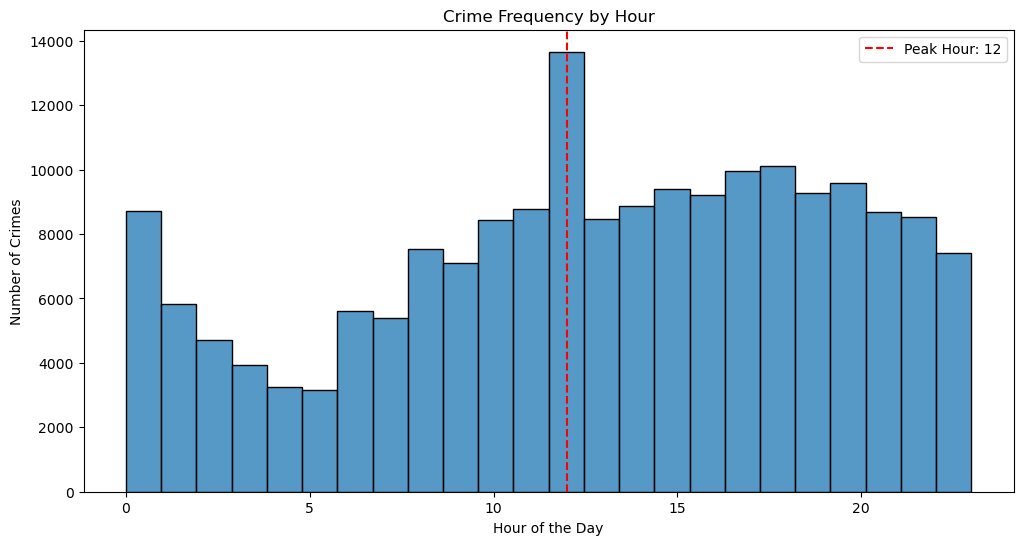

In [11]:
##Finding Peak Crime Hour
df_times = crimes.groupby('TIME OCC')['Crm Cd Desc'].count().rename('num_crimes').reset_index()
df_times = df_times.sort_values('num_crimes', ascending=False)

peak_crime_hour = df_times.iloc[0,0]

peak_crime_hour = int(peak_crime_hour)

# Histogram of crime frequency by hour
plt.figure(figsize=(12, 6))
sns.histplot(crimes['TIME OCC'], bins=24, kde=False)
plt.title('Crime Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.axvline(x=peak_crime_hour, color='r', linestyle='--', label=f'Peak Hour: {peak_crime_hour}')
plt.legend()
plt.show()

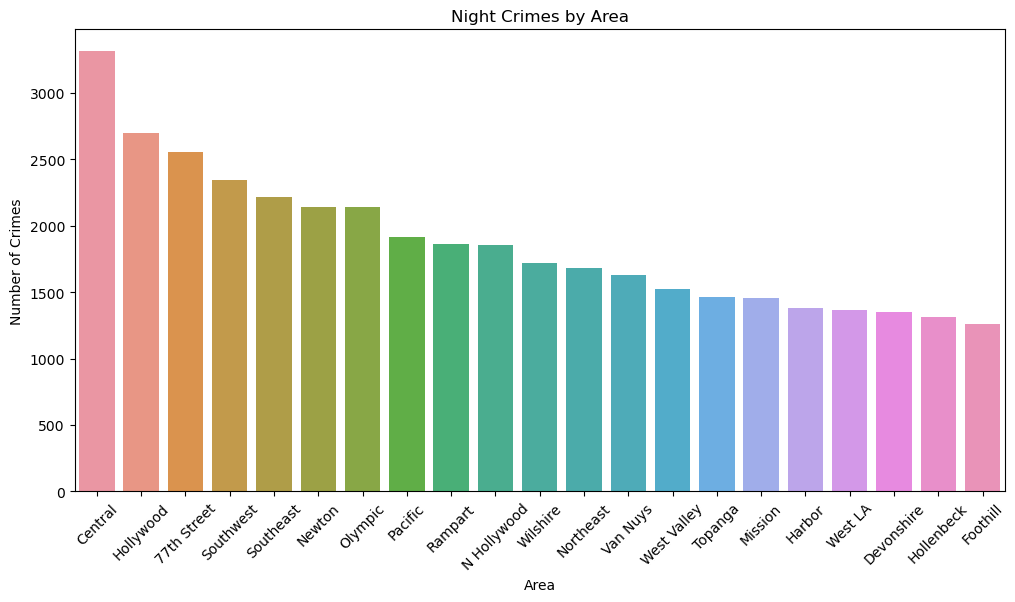

In [9]:
## Area with largest frequency of night crimes
#first lets define night times
night_times = [22,23,0,1,2,3]

#Filtering the df based on just night hours
night_df = crimes[crimes['TIME OCC'].isin(night_times)]

df_grouped_locations = night_df.groupby('AREA NAME')['Crm Cd Desc'].count().rename('num_crimes').reset_index().sort_values('num_crimes', ascending=False)

peak_night_crime_location = 'Central'

# Bar chart of night crimes by area
plt.figure(figsize=(12, 6))
sns.barplot(x='AREA NAME', y='num_crimes', data=df_grouped_locations)
plt.title('Night Crimes by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


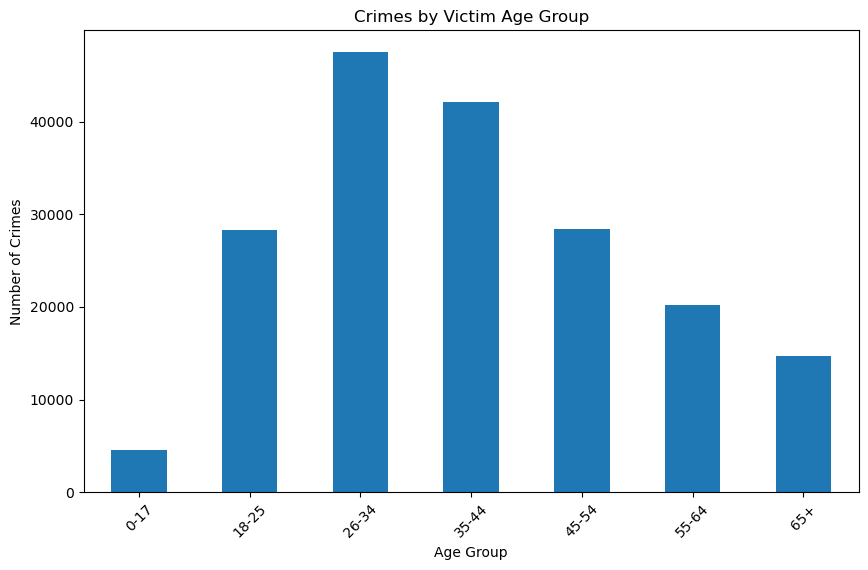

In [10]:
# Creating age labels based on Age
df_ages = crimes
df_ages

#Creating a conditions list

conditions = [
    ((df_ages['Vict Age']>= 0) & (df_ages['Vict Age']<=17)),
    ((df_ages['Vict Age']>=18) & (df_ages['Vict Age']<=25)),
    ((df_ages['Vict Age']>=26) & (df_ages['Vict Age']<=34)),
    ((df_ages['Vict Age']>=35) & (df_ages['Vict Age']<=44)),
    ((df_ages['Vict Age']>=45) & (df_ages['Vict Age']<=54)),
    ((df_ages['Vict Age']>=55) & (df_ages['Vict Age']<=64)),
    (df_ages['Vict Age']>=65)
]

# Creating an associated label list

labels = [
    "0-17",
    "18-25",
    "26-34",
    "35-44",
    "45-54",
    "55-64",
    "65+"
]

# Creating a new column based on the conditions and labels
df_ages['age group'] = np.select(conditions,labels, default="Unknown Age")

victim_ages = df_ages.groupby('age group')['Crm Cd Desc'].count().rename('num_crimes_against')

# Bar chart of crimes by victim age group
plt.figure(figsize=(10, 6))
victim_ages.plot(kind='bar')
plt.title('Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


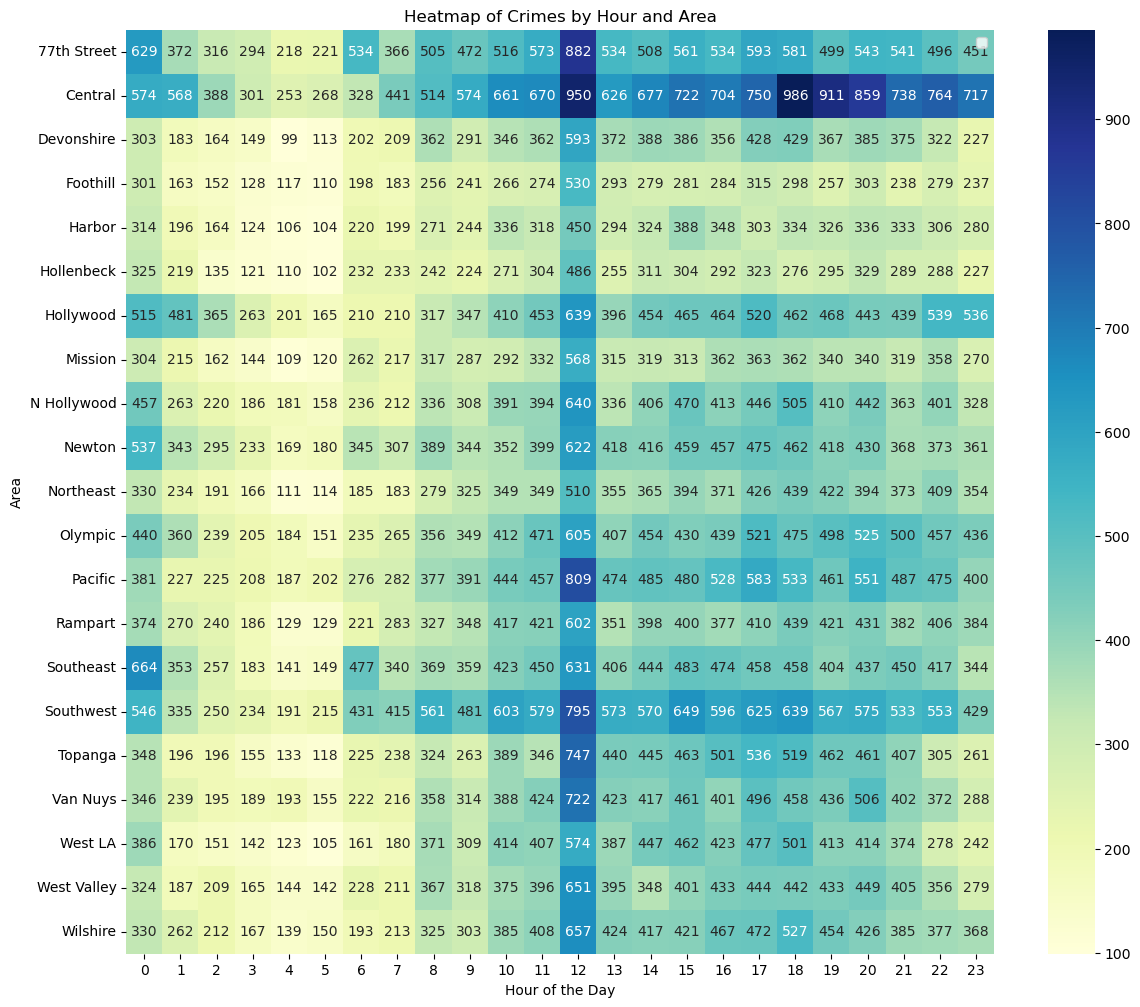

In [17]:

# Creating a pivot table for the heatmap
heatmap_data = crimes.pivot_table(index='AREA NAME', columns='TIME OCC', values='Crm Cd Desc', aggfunc='count')

# Heatmap of crimes by hour and area
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Crimes by Hour and Area')
plt.xlabel('Hour of the Day')
plt.ylabel('Area')
plt.legend()
plt.show()
